# 1-Uber NewYork Data Analysis
---

In [35]:
import sys
import platform
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import csv
from collections import Counter
from plotly.offline import iplot
import plotly as py
import plotly.tools as tls
import os
import plotly.express as px

print(f"Executable Python: {sys.executable}")
print(f"Python Version: {platform.python_version()}")

#To show multiple outputs and misc. changes
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # Show all results without print (last_expr)

Executable Python: C:\Users\maity\.conda\envs\aku_mldl\python.exe
Python Version: 3.9.6


In [14]:
files=os.listdir(r"G:\My Drive\Handson_projects_udemy\1_uber_NY_handson_data")[-7:]
files

['uber-raw-data-aug14.csv',
 'uber-raw-data-janjune-15.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv',
 'uber-raw-data-apr14.csv']

In [15]:
files.remove('uber-raw-data-janjune-15.csv')
files

['uber-raw-data-aug14.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv',
 'uber-raw-data-apr14.csv']

In [16]:
path=r"G:\My Drive\Handson_projects_udemy\1_uber_NY_handson_data"
final=pd.DataFrame()
for file in files:
    df=pd.read_csv(path+"/"+file,encoding='utf-8')
    final = pd.concat([final,df])

In [17]:
final.shape
final.head()

(4534327, 4)

,Date/Time,Lat,Lon,Base
0,8/1/2014 0:03:00,40.7366,-73.9906,B02512
1,8/1/2014 0:09:00,40.7260,-73.9918,B02512
2,8/1/2014 0:12:00,40.7209,-74.0507,B02512
3,8/1/2014 0:12:00,40.7387,-73.9856,B02512
4,8/1/2014 0:12:00,40.7323,-74.0077,B02512


In [18]:
df1 = final.copy()

In [20]:
df1.head()
df1.dtypes

,Date/Time,Lat,Lon,Base
0,8/1/2014 0:03:00,40.7366,-73.9906,B02512
1,8/1/2014 0:09:00,40.7260,-73.9918,B02512
2,8/1/2014 0:12:00,40.7209,-74.0507,B02512
3,8/1/2014 0:12:00,40.7387,-73.9856,B02512
4,8/1/2014 0:12:00,40.7323,-74.0077,B02512


Date/Time     object
Lat          float64
Lon          float64
Base          object
dtype: object

In [22]:
df1['Date/Time']=pd.to_datetime(df1['Date/Time'],format='%m/%d/%Y %H:%M:%S')
df1.dtypes

Date/Time    datetime64[ns]
Lat                 float64
Lon                 float64
Base                 object
dtype: object

In [23]:
df1.head()

,Date/Time,Lat,Lon,Base
0,2014-08-01 00:03:00,40.7366,-73.9906,B02512
1,2014-08-01 00:09:00,40.7260,-73.9918,B02512
2,2014-08-01 00:12:00,40.7209,-74.0507,B02512
3,2014-08-01 00:12:00,40.7387,-73.9856,B02512
4,2014-08-01 00:12:00,40.7323,-74.0077,B02512


In [30]:
df1['Weekday']=df1['Date/Time'].dt.day_name()
df1['day']=df1['Date/Time'].dt.day
df1['minute']=df1['Date/Time'].dt.minute
df1['month']=df1['Date/Time'].dt.month
df1['hours']=df1['Date/Time'].dt.hour

In [31]:
df1.head()

,Date/Time,Lat,Lon,Base,Weekday,day,minute,month,hours
0,2014-08-01 00:03:00,40.7366,-73.9906,B02512,Friday,1,3,8,0
1,2014-08-01 00:09:00,40.7260,-73.9918,B02512,Friday,1,9,8,0
2,2014-08-01 00:12:00,40.7209,-74.0507,B02512,Friday,1,12,8,0
3,2014-08-01 00:12:00,40.7387,-73.9856,B02512,Friday,1,12,8,0
4,2014-08-01 00:12:00,40.7323,-74.0077,B02512,Friday,1,12,8,0


In [33]:
df1['Weekday'].value_counts().index

Index(['Thursday', 'Friday', 'Wednesday', 'Tuesday', 'Saturday', 'Monday',
       'Sunday'],
      dtype='object')

In [36]:
px.bar(x=df1['Weekday'].value_counts().index,
          y=df1['Weekday'].value_counts()
          )

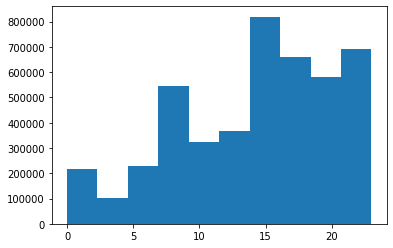

In [38]:
plt.hist(df1['hours']);

In [39]:
months=df1['month'].unique()

array([8, 7, 6, 5, 9, 4], dtype=int64)

In [40]:
for i,month in enumerate(df1['month'].unique()):
    print(i)
    print(month)

0
8
1
7
2
6
3
5
4
9
5
4


<Figure size 2880x1440 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

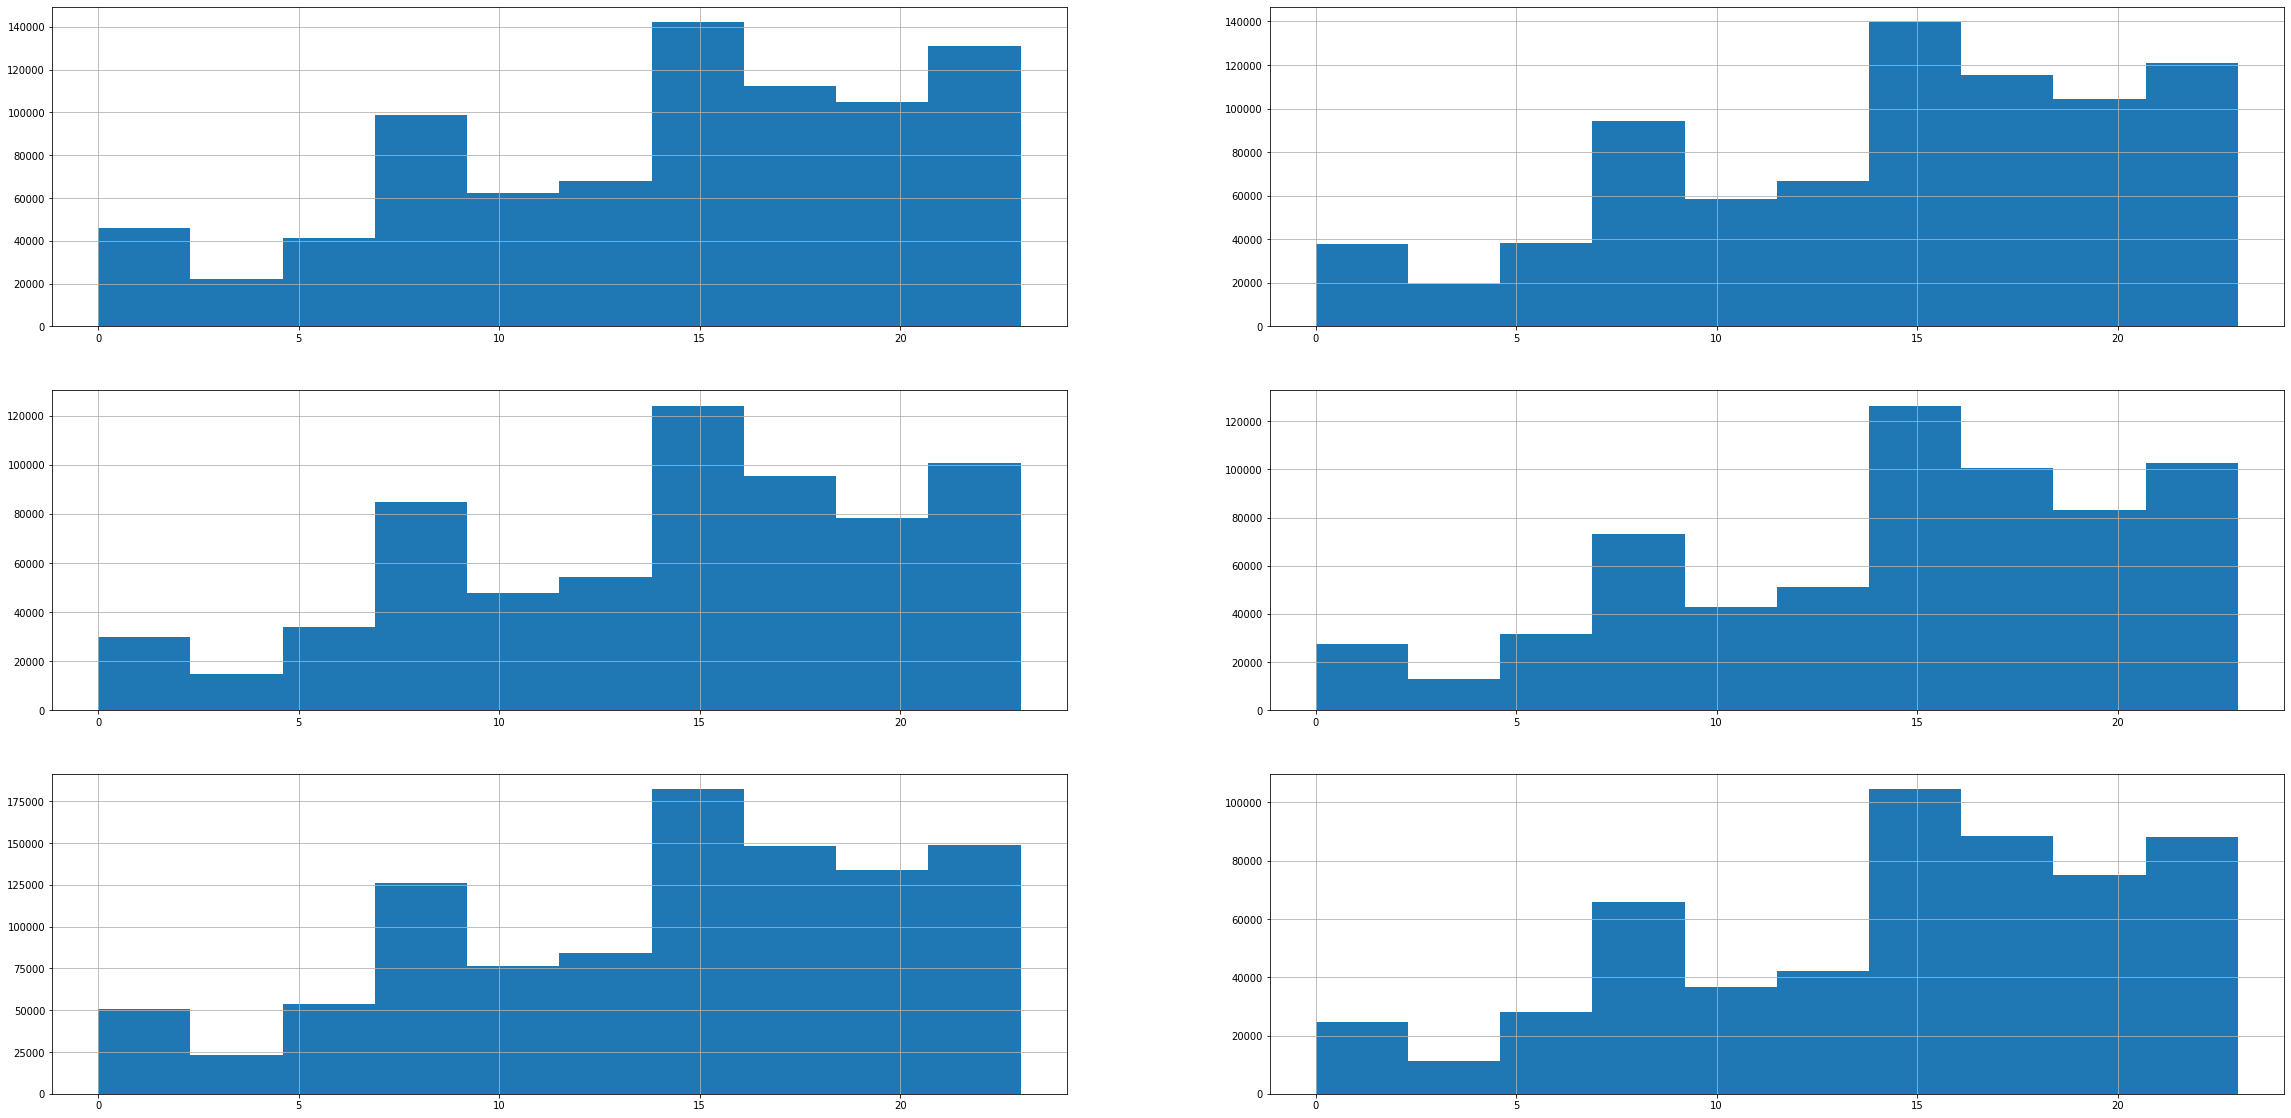

In [43]:
plt.figure(figsize=(40,20))
for i,month in enumerate(df1['month'].unique()):
    plt.subplot(3,2,i+1)
    df1[df1['month']==month]['hours'].hist();